##MLP

In [1]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data.sampler import SubsetRandomSampler

In [2]:
# image 를 tensor 로 바꾸고 normalize 하는 transform 정의
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5),)])

# train set 과 test set Load
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data', download=True, train=True, transform=transform)
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data', download=True, train=False, transform=transform)

# validation set 준비
indices = list(range(len(trainset)))
np.random.shuffle(indices)

# 20% valid set from train set
split = int(np.floor(0.2 * len(trainset)))
train_sample = SubsetRandomSampler(indices[:split])
valid_sample = SubsetRandomSampler(indices[split:])

# Data Loader
trainloader = torch.utils.data.DataLoader(trainset, sampler=train_sample, batch_size=64)
validloader = torch.utils.data.DataLoader(trainset, sampler=valid_sample, batch_size=64)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

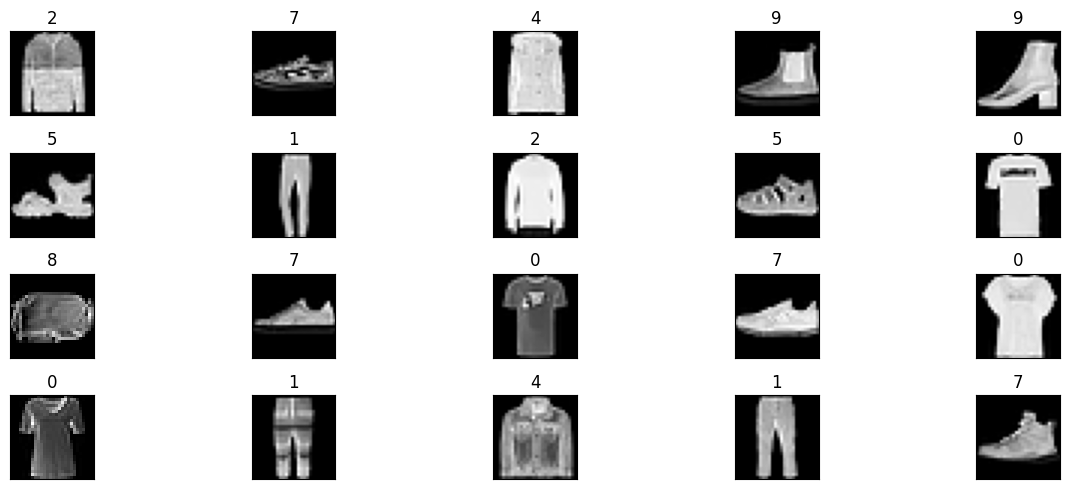

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

dataiter = iter(trainloader)
print(dataiter)
images, labels = next(dataiter)


fig = plt.figure(figsize=(15,5))
for idx in np.arange(20):
  ax = fig.add_subplot(4, int(20/4), idx+1, xticks=[], yticks=[])
  ax.imshow(np.squeeze(images[idx]), cmap='gray')

  ax.set_title(labels[idx].item())
  fig.tight_layout()

In [ ]:
# Model build

class Classifier(nn.Module):
  def __init__(self):
    '''

    여기에 입력해주세요

    '''

  def forward(self, x):
    '''

    여기에 입력해주세요

    '''

In [ ]:
model = ''' 여기에 입력해주세요  '''


criterion = ''' 여기에 입력해주세요  '''
optimizer = ''' 여기에 입력해주세요  '''

In [ ]:
valid_loss_min = np.Inf
epochs = 40
steps = 0
model.train() # 모델 학습 준비
train_losses, valid_losses = [], []

for e in range(epochs):
  running_loss = 0
  valid_loss = 0

  # train the model

    '''

    여기에 입력해주세요

    '''

  train_losses.append(running_loss)
  valid_losses.append(valid_loss)

  print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
      e+1,
      running_loss,
      valid_loss
  ))

  if valid_loss < valid_loss_min:
    print('validation loss decreased({:.6f} --> {:.6f}). Saving Model ...'.format(valid_loss_min, valid_loss))
    torch.save(model.state_dict(), 'model.pt')
    valid_loss_min = valid_loss

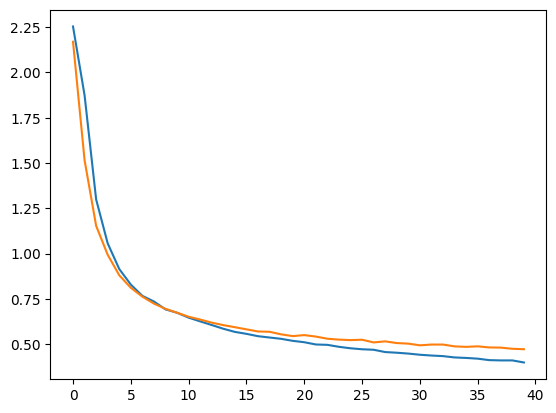

In [ ]:
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Valid Loss')

In [ ]:
test_loss = 0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))


model.eval()
for images, labels in testloader:
  # forword pass
    ''' 여기에 입력해주세요 '''
  # calc loss
    ''' 여기에 입력해주세요 '''

  # update test loss
    '''

    여기에 입력해주세요

    '''

  for i in range(len(labels)):
    label = labels.data[i]
    class_correct[label] += correct[i].item()
    class_total[label] += 1

test_loss = test_loss / len(testloader.sampler)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
  if class_total[i] > 0:
    print('Test Accuracy of %5s: %2d%% (%2d/%2d)'%
          (str(i), 100 * class_correct[i]/class_total[i],
           np.sum(class_correct[i]), np.sum(class_total[i])))

  else:
    print('Test Accuracy of %5s: N/A(no training examples)' % classes[i])

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)
))


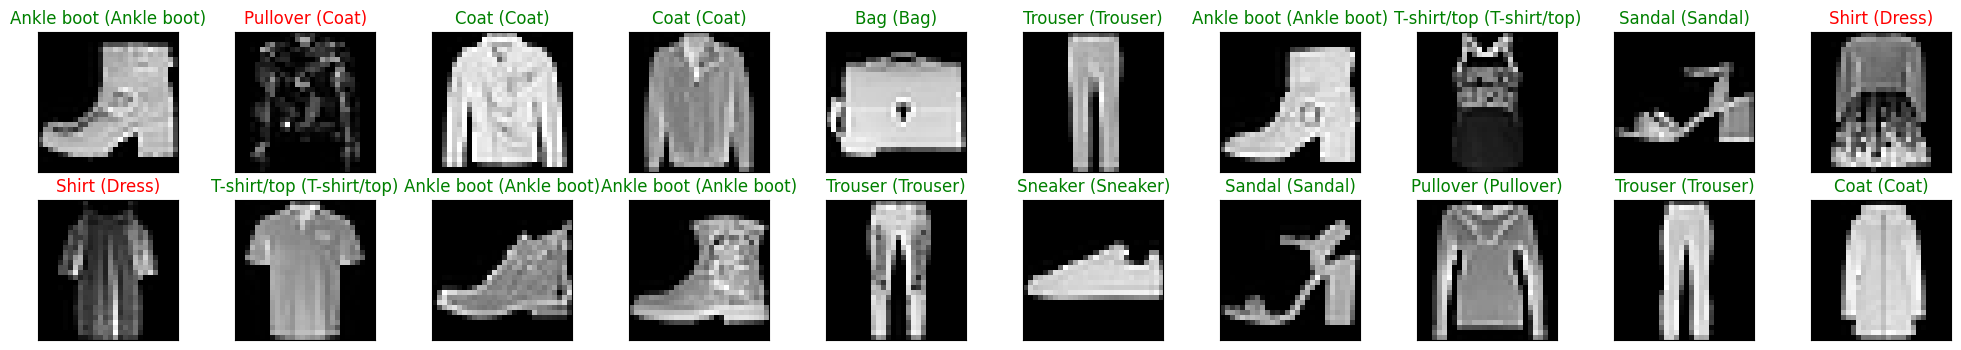

In [ ]:
label_info = {0:"T-shirt/top", 1:"Trouser", 2:"Pullover", 3:"Dress", 4:"Coat", 5:"Sandal", 6:"Shirt", 7:"Sneaker", 8:"Bag", 9:"Ankle boot"}

dataiter = iter(testloader)
images, labels = next(dataiter)

output = model(images)
_, preds = torch.max(output, 1)
images = images.numpy()

fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
  ax = fig.add_subplot(2, int(20/2), idx+1, xticks=[], yticks=[])
  ax.imshow(np.squeeze(images[idx]), cmap='gray')
  ax.set_title("{} ({})".format(label_info[preds[idx].item()], label_info[labels[idx].item()]),
               color=("green" if preds[idx]==labels[idx] else "red"))

##CNN

GPU 사용

런타임 -> 런타임 유형 변경 -> GPU 선택

###Convolution operation 효과 확인 with 정적인 filter

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_sample_image
import numpy as np

In [4]:
import torch
import torchvision
import torchvision.transforms as transforms

In [5]:
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])

In [6]:
batch_size, height, width, channels = images.shape
print("batch_size : ",batch_size,"\nheight * width : ", height,"*",width,"\nchannels :", channels)

batch_size :  2 
height * width :  427 * 640 
channels : 3


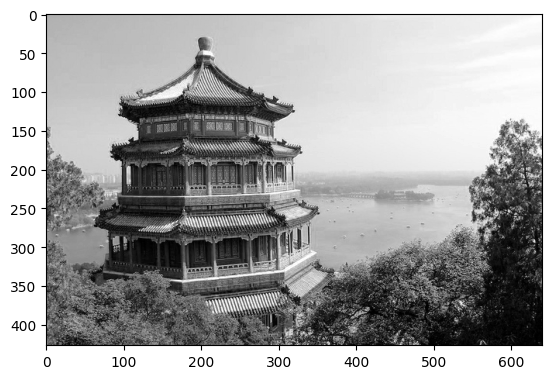

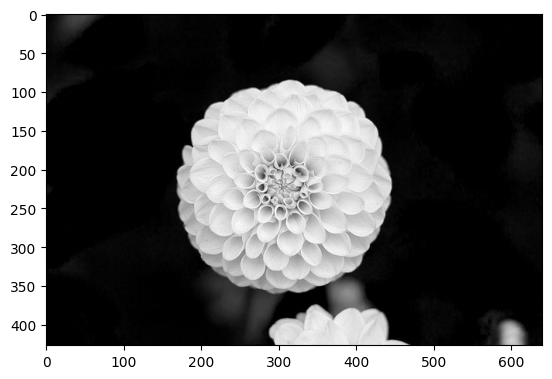

In [7]:
plt.imshow(images[0][:,:,0], cmap='gray')
plt.show()
plt.imshow(images[1][:,:,0], cmap='gray')
plt.show()

In [8]:
# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1 # vertical line
filters[3, :, :, 1] = 1 # horizontal line

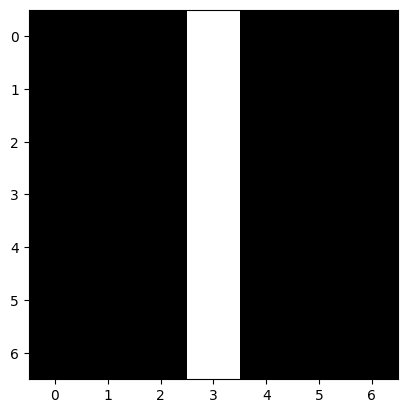

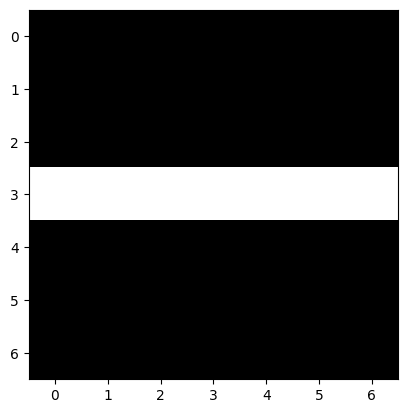

In [9]:
# Visualizing
plt.imshow(filters[:, :, 0, 0],cmap="gray") # First filter
plt.show()
plt.imshow(filters[:, :, 0, 1],cmap="gray") # Second filter
plt.show()

(421, 634, 1)


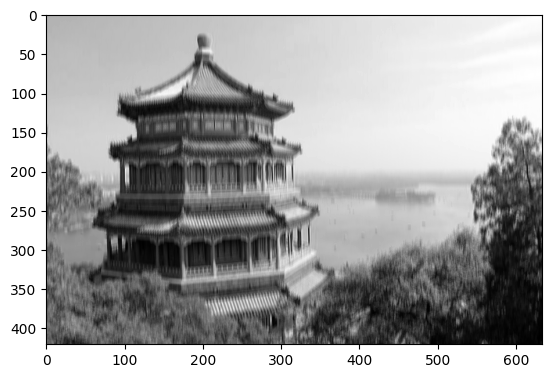

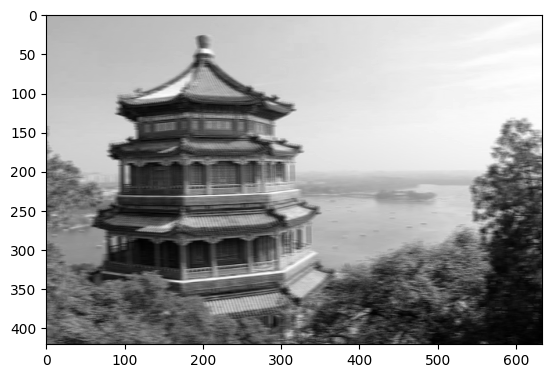

In [10]:
# outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")
filter = torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=7)
filter.weight = torch.nn.Parameter(torch.Tensor(np.array([[filters[:, :, 0, 0]]])))
output1 = filter(torch.Tensor(images[0][None, :,:,0]))
output1 = output1.permute(1, 2, 0).detach().numpy()
print(output1.shape)
plt.imshow(output1, cmap="gray") # plot 1st image's 1st feature map
plt.show()


filter = torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=7)
filter.weight = torch.nn.Parameter(torch.Tensor(np.array([[filters[:, :, 0, 1]]])))
output2 = filter(torch.Tensor(images[0][None, :,:,0]))
output2 = output2.permute(1, 2, 0).detach().numpy()
plt.imshow(output2, cmap="gray") # plot 1st image's 2nd feature map
plt.show()

outputs = [output1, output2]

In [11]:
# Function for cropping
def crop(images):
  return images[150:220, 130:250]

china_vertical


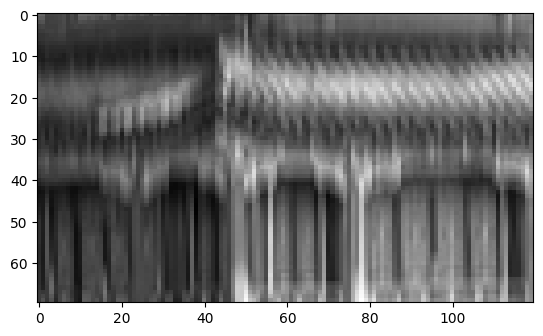

china_horizontal


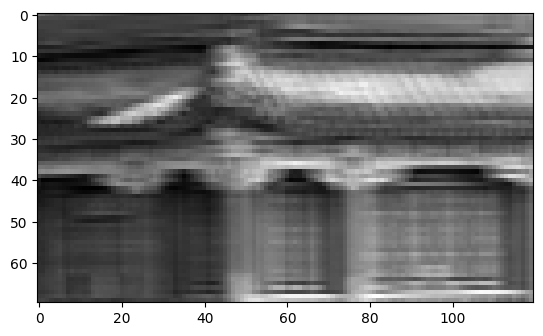

In [12]:
for feature_map_index, filename in enumerate(["china_vertical","china_horizontal"]):
  print(filename)
  plt.imshow(crop(outputs[feature_map_index]),cmap="gray")
  plt.show()

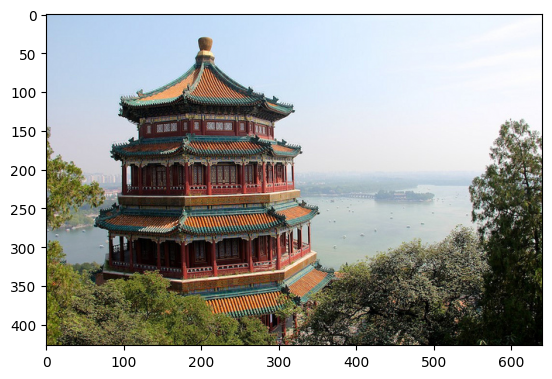

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(427, 640, 3)
(1, 421, 634, 3)


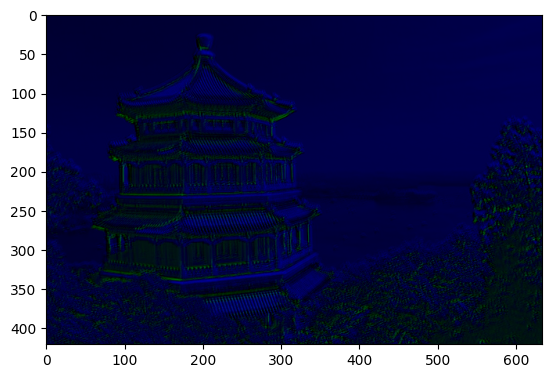

In [13]:
plt.imshow(images[0][:,:,:])
plt.show()

filter = torch.nn.Conv2d(in_channels=3, out_channels=3, kernel_size=7)
print(images[0].shape)
output3 = filter(torch.Tensor(images[0][None, :, :, :]).permute(0, 3, 1, 2))
output3 = output3.permute(0, 2, 3, 1).detach().numpy()
print(output3.shape)
plt.imshow(output3[0], cmap="gray") # plot 1st image's 1st feature map
plt.show()

Pooling layer

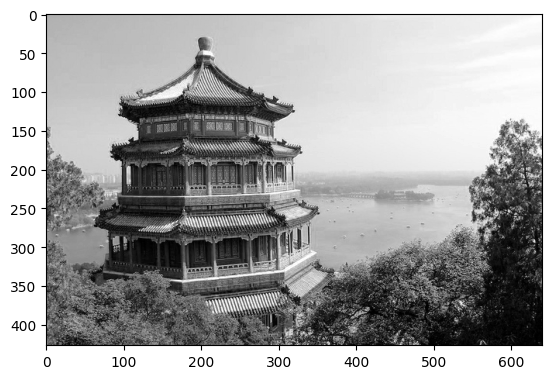

Input's H*W :  (427, 640)


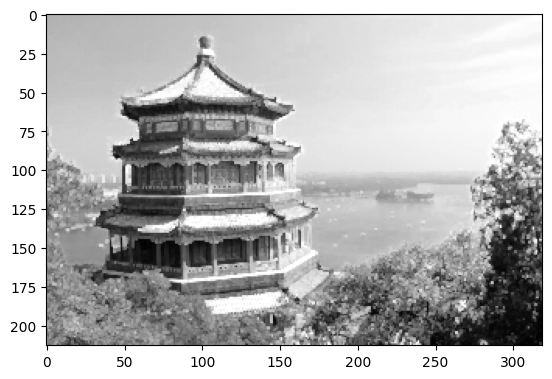

Output's H*W :  (213, 319)


In [ ]:
# pooling layer
max_pool = torch.nn.MaxPool2d(3, 2)
outputs = max_pool(torch.Tensor(images[None, 0, :, :, 0])).detach().numpy()
plt.imshow(images[0, :, :, 0], cmap="gray")
plt.show()
print("Input's H*W : ",images[0, :, :, 0].shape)
plt.imshow(outputs[0, :, :], cmap="gray")
plt.show()
print("Output's H*W : ",outputs[0, :, :].shape)

###CNN 기본구조 학습

In [45]:
device = torch.device('mps:0' if torch.backends.mps.is_available() else 'cpu')
print(device)

mps:0


In [46]:
transform = transforms.Compose([transforms.ToTensor(), 
                               transforms.Normalize((0.5, 0.5, 0.5,), (0.5, 0.5, 0.5,))
                               ])

batch_size =  4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


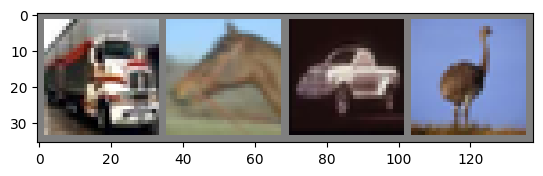

truck horse car   bird 


In [47]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [48]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    

net = Net()

net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [49]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [50]:
epochs = 10

for epoch in range(epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        # inputs, labels = data
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        # if i % 2000 == 1999:    # print every 2000 mini-batches

    print(f'[{epoch + 1}, loss: {running_loss / len(trainloader):.3f}')


print('Finished Training')

[1, loss: 1.707
[2, loss: 1.356
[3, loss: 1.230
[4, loss: 1.136
[5, loss: 1.067
[6, loss: 1.010
[7, loss: 0.966
[8, loss: 0.924
[9, loss: 0.892
[10, loss: 0.860
Finished Training


In [52]:
PATH = './model/cifar_net.pth'
torch.save(net.state_dict(), PATH)

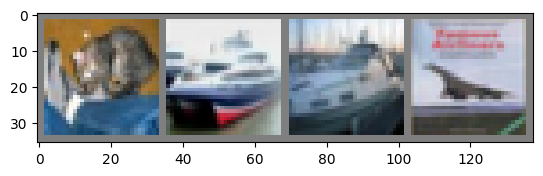

GroundTruth:  cat   ship  ship  plane


In [53]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [54]:
# load model
net = Net()
net.to(device)
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [55]:
# forward data into model
outputs = net(images.to(device))

In [56]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  ship  plane ship  plane


In [57]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images.to(device))
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.to(device)).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 59 %


In [60]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images.to(device))
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label.to(device) == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 65.7 %
Accuracy for class: car   is 84.5 %
Accuracy for class: bird  is 44.6 %
Accuracy for class: cat   is 42.0 %
Accuracy for class: deer  is 49.4 %
Accuracy for class: dog   is 52.6 %
Accuracy for class: frog  is 62.5 %
Accuracy for class: horse is 59.9 %
Accuracy for class: ship  is 84.3 %
Accuracy for class: truck is 52.8 %


###**모델** 구조 변경

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 200

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        '''

        여기에 입력해주세요

        '''

    def forward(self, x):
        '''

        여기에 입력해주세요

        '''

net = Net()

net.to(device)

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
# Various optimizers exist
# optimizer = optim.Adam(net.parameters(), lr=0.005, momentum=0.9)
# optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
''' 여기에 입력해주세요 '''

In [ ]:
epochs = 300

for epoch in range(epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        # inputs, labels = data
        ''' 여기에 입력해주세요 '''
        # zero the parameter gradients
        ''' 여기에 입력해주세요 '''

        # forward + backward + optimize
        '''

        여기에 입력해주세요

        '''
        # print statistics
        running_loss += loss.item()
        # if i % 2000 == 1999:    # print every 2000 mini-batches

    print(f'[{epoch + 1}, loss: {running_loss / len(trainloader):.3f}]')


print('Finished Training')

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        ''' 여기에 입력해주세요 '''
        # calculate outputs by running images through the network
        ''' 여기에 입력해주세요 '''
        # the class with the highest energy is what we choose as prediction
        ''' 여기에 입력해주세요 '''
        correct += (predicted == labels.to(device)).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 71 %


###ResNet

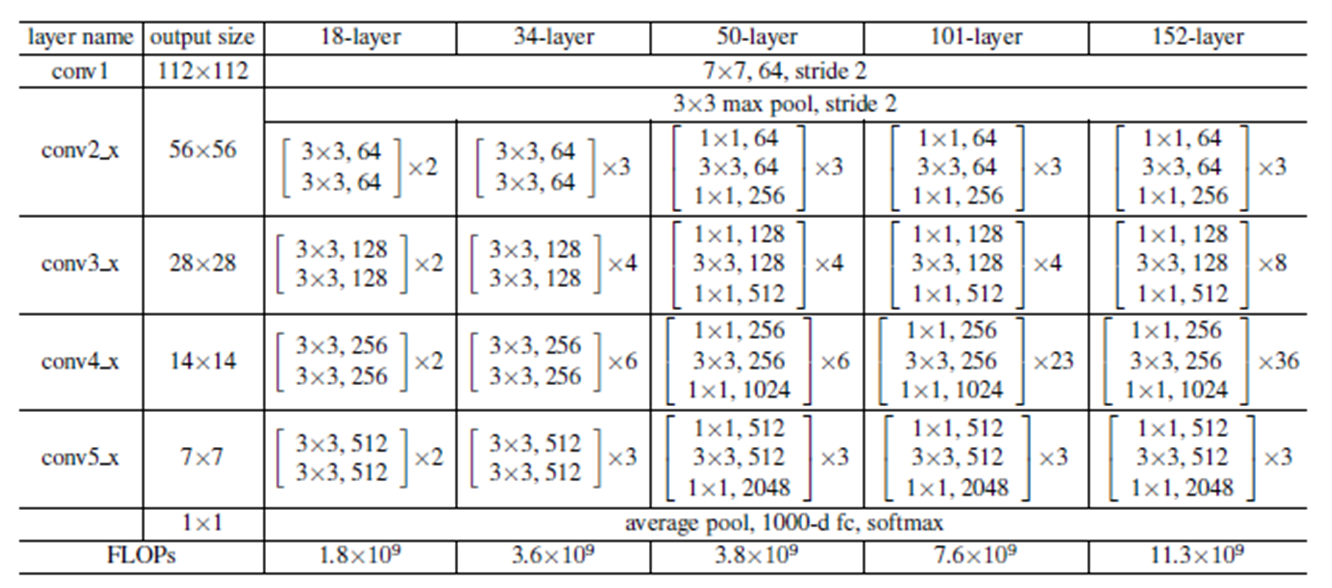

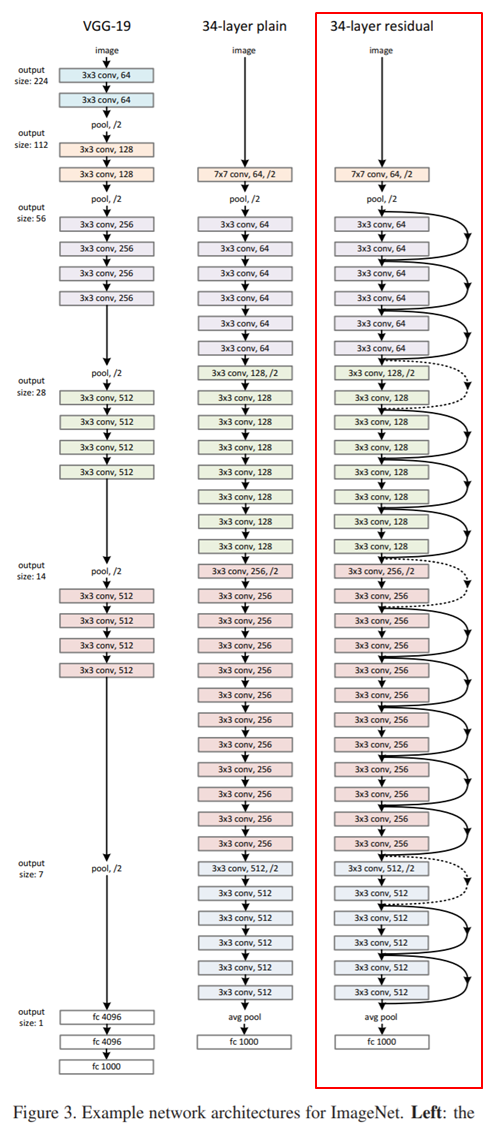

In [16]:
import torch
import math
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch.utils.model_zoo as model_zoo
from torchvision import datasets, transforms
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision.transforms.functional import to_pil_image

In [17]:
transform = transforms.Compose([transforms.Grayscale(3), transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data', download=True, train=True, transform=transform)
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data', download=True, train=False, transform=transform)

indices = list(range(len(trainset)))
np.random.shuffle(indices)

split = int(np.floor(0.2 * len(trainset)))
train_sample = SubsetRandomSampler(indices[:split])
valid_sample = SubsetRandomSampler(indices[split:])

trainloader = torch.utils.data.DataLoader(trainset, sampler=train_sample, batch_size=64)
validloader = torch.utils.data.DataLoader(trainset, sampler=valid_sample, batch_size=64)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [18]:
## 이전 CNN tutorial에서 사용한 코드 셋팅.

def train_mode(model, optimizer, criterion, epochs):
    valid_loss_min = np.Inf
    steps = 0
    model.train()  # 모델 학습 준비
    train_losses, valid_losses = [], []

    for e in range(epochs):
        running_loss = 0
        valid_loss = 0

        # train the model
        for images, labels in trainloader:
            optimizer.zero_grad()
            pred = model(images)
            loss = criterion(pred, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * images.size(0)

        for images, labels in validloader:
            pred = model(images)
            loss = criterion(pred, labels)
            valid_loss += loss.item() * images.size(0)

        running_loss = running_loss / len(trainloader.sampler)
        valid_loss = valid_loss / len(validloader.sampler)
        train_losses.append(running_loss)
        valid_losses.append(valid_loss)

        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            e + 1,
            running_loss,
            valid_loss
        ))

        if valid_loss < valid_loss_min:
            print('validation loss decreased({:.6f} --> {:.6f}). Saving Model ...'.format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(), 'model.pt')
            valid_loss_min = valid_loss

    return train_losses, valid_losses

In [19]:
def test_mode(model, criterion):
    test_loss = 0
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))

    model.eval()
    for images, labels in testloader:
        # forword pass
        output = model(images)
        # calc loss
        loss = criterion(output, labels)
        # update test loss
        test_loss += loss.item() * images.size(0)
        _, pred = torch.max(output, 1)
        correct = np.squeeze(pred.eq(labels.data.view_as(pred)))

        for i in range(len(labels)):
            label = labels.data[i]
            class_correct[label] += correct[i].item()
            class_total[label] += 1

    test_loss = test_loss / len(testloader.sampler)
    print('Test Loss: {:.6f}\n'.format(test_loss))

    for i in range(10):
        if class_total[i] > 0:
            print('Test Accuracy of %5s: %2d%% (%2d/%2d)' %
                  (str(i), 100 * class_correct[i] / class_total[i],
                   np.sum(class_correct[i]), np.sum(class_total[i])))

        else:
            print('Test Accuracy of %5s: N/A(no training examples)' % classes[i])

    print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
        100. * np.sum(class_correct) / np.sum(class_total),
        np.sum(class_correct), np.sum(class_total)
    ))

In [20]:
def evaluation(model):
    label_info = {0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

    dataiter = iter(testloader)
    images, labels = next(dataiter)

    output = model(images)
    _, preds = torch.max(output, 1)

    fig = plt.figure(figsize=(25, 4))
    for idx in np.arange(20):
        ax = fig.add_subplot(2, int(20 / 2), idx + 1, xticks=[], yticks=[])

        # Convert the torch tensor to a PIL Image
        img = to_pil_image(images[idx])
        ax.imshow(np.asarray(img))  # Convert to NumPy array before displaying

        ax.set_title("{} ({})".format(label_info[preds[idx].item()], label_info[labels[idx].item()]),
                     color=("green" if preds[idx] == labels[idx] else "red"))


torch hub 사용하기

In [21]:
### ResNet simple version 18, 34, 50, 101, 152

model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)
model.eval()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
epochs = 3

Using cache found in /Users/jiwoossong/.cache/torch/hub/pytorch_vision_v0.10.0


Epoch: 1 	Training Loss: 0.859796 	Validation Loss: 0.512467
validation loss decreased(inf --> 0.512467). Saving Model ...
Epoch: 2 	Training Loss: 0.368010 	Validation Loss: 0.425080
validation loss decreased(0.512467 --> 0.425080). Saving Model ...
Epoch: 3 	Training Loss: 0.308541 	Validation Loss: 0.471526


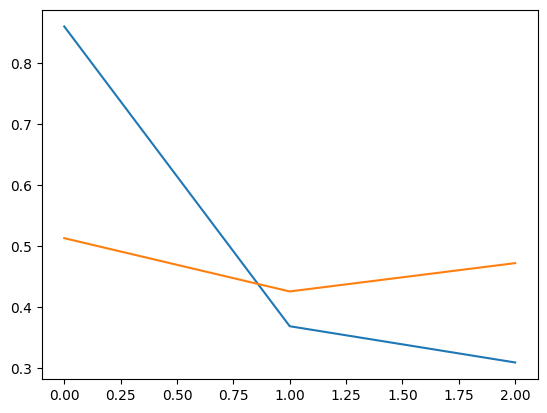

In [22]:
# ResNet 학습 & loss 확인
train_losses, valid_losses = train_mode(model, optimizer, criterion, epochs)
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Valid Loss')

In [23]:
# ResNet test
test_mode(model, criterion)

Test Loss: 0.448048

Test Accuracy of     0: 90% (909/1000)
Test Accuracy of     1: 96% (962/1000)
Test Accuracy of     2: 82% (829/1000)
Test Accuracy of     3: 91% (918/1000)
Test Accuracy of     4: 64% (648/1000)
Test Accuracy of     5: 81% (815/1000)
Test Accuracy of     6: 53% (539/1000)
Test Accuracy of     7: 99% (995/1000)
Test Accuracy of     8: 96% (968/1000)
Test Accuracy of     9: 91% (919/1000)

Test Accuracy (Overall): 85% (8502/10000)


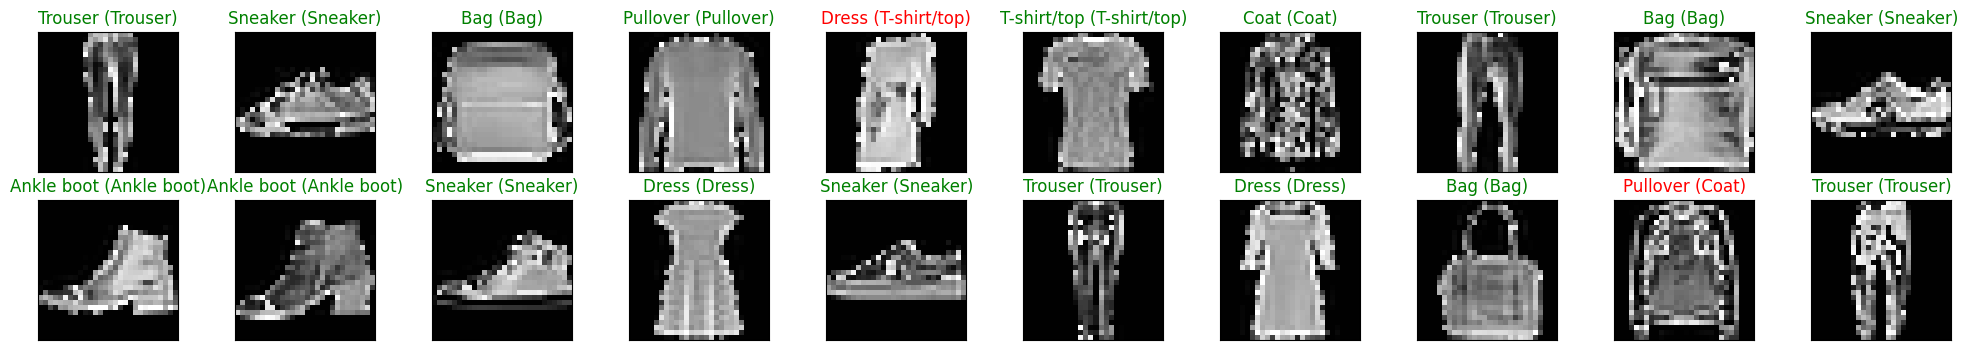

In [24]:
# 학습한 모델 plt로 확인해보기
evaluation(model)

ResNet 직접 만들기

In [25]:
############ ResNet 심화 버전
model_urls = {
    'resnet18': 'https://download.pytorch.org/models/resnet18-5c106cde.pth',
    'resnet34': 'https://download.pytorch.org/models/resnet34-333f7ec4.pth',
    'resnet50': 'https://download.pytorch.org/models/resnet50-19c8e357.pth',
    'resnet101': 'https://download.pytorch.org/models/resnet101-5d3b4d8f.pth',
    'resnet152': 'https://download.pytorch.org/models/resnet152-b121ed2d.pth',
}


def conv3x3(in_planes, out_planes, stride=1):
    "3x3 convolution with padding"
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=1, bias=False)


class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(BasicBlock, self).__init__()
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = nn.BatchNorm2d(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = nn.BatchNorm2d(planes)
        self.downsample = downsample
        self.stride = stride
        
    def forward(self, x):
        residual = x
        
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        
        out = self.conv2(out)
        out = self.bn2(out)
        
        if self.downsample is not None:
            residual = self.downsample(x)
        out += residual
        out = self.relu(out)
        
        return out

class Bottleneck(nn.Module):
    expansion = 4

    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(Bottleneck, self).__init__()
        self.conv1 = nn.Conv2d(inplanes, planes, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        self.conv3 = nn.Conv2d(planes, planes * 4, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(planes * 4)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        residual = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        
        out = self.conv2(x)
        out = self.bn2(out)
        out = self.relu(out)
        
        out = self.conv3(x)
        out = self.bn3(out)

        if self.downsample is not None:
            residual = self.downsample(x)
        out += residual
        out  = self.relu(out)


class ResNet(nn.Module):

    def __init__(self, block, layers, num_classes=1000):
        self.inplanes = 64
        super(ResNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2)
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        
        self.fc = nn.Linear(512 * block.expansion, num_classes)
        
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
                m.weight.data.normal_(0, math.sqrt(2. / n))
            elif isinstance(m, nn.BatchNorm2d):
                m.weight.data.fill_(1)
                m.bias.data.zero_()


    def _make_layer(self, block, planes, blocks, stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.inplanes, planes * block.expansion,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes * block.expansion),
            )
        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes * block.expansion
        for i in range(1, blocks):
            layers.append(block(self.inplanes, planes))
            
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        
        return x


def generate_model(model_depth, pretrained=False, **kwargs):
    assert model_depth in [10, 18, 34, 50, 101, 152]

    if model_depth == 18:
        model = ResNet(BasicBlock, [2, 2, 2, 2], **kwargs)
        if pretrained:
            model.load_state_dict(model_zoo.load_url(model_urls['resnet18']))

    elif model_depth == 34:
        model = ResNet(BasicBlock, [3, 4, 6, 3], **kwargs)
        if pretrained:
            model.load_state_dict(model_zoo.load_url(model_urls['resnet34']))

    elif model_depth == 50:
        model = ResNet(Bottleneck, [3, 4, 6, 3], **kwargs)
        if pretrained:
            model.load_state_dict(model_zoo.load_url(model_urls['resnet50']))

    elif model_depth == 101:
        model = ResNet(Bottleneck, [3, 4, 23, 3], **kwargs)
        if pretrained:
            model.load_state_dict(model_zoo.load_url(model_urls['resnet101']))

    elif model_depth == 152:
        model = ResNet(Bottleneck, [3, 8, 36, 3], **kwargs)
        if pretrained:
            model.load_state_dict(model_zoo.load_url(model_urls['resnet152']))

    return model

In [28]:
# 이전과 똑같이 학습 셋팅
model = generate_model(model_depth=18, pretrained=True)
model.eval()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
epochs = 1

print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

Epoch: 1 	Training Loss: 0.875651 	Validation Loss: 0.523621
validation loss decreased(inf --> 0.523621). Saving Model ...


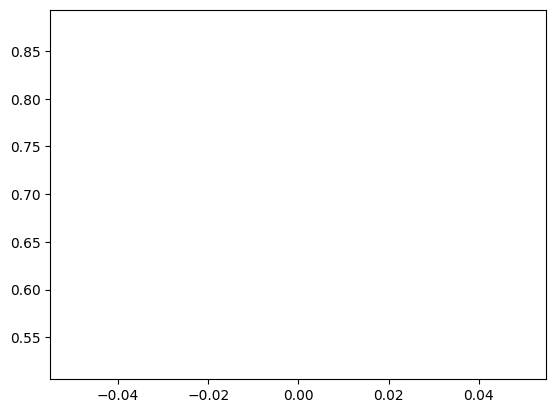

In [29]:
# ResNet 학습 & loss 확인
train_losses, valid_losses = train_mode(model, optimizer, criterion, epochs)
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Valid Loss')

In [31]:
# ResNet 테스트
test_mode(model, criterion)

Test Loss: 0.470721

Test Accuracy of     0: 74% (747/1000)
Test Accuracy of     1: 93% (930/1000)
Test Accuracy of     2: 76% (768/1000)
Test Accuracy of     3: 91% (916/1000)
Test Accuracy of     4: 75% (756/1000)
Test Accuracy of     5: 93% (931/1000)
Test Accuracy of     6: 51% (516/1000)
Test Accuracy of     7: 81% (811/1000)
Test Accuracy of     8: 94% (947/1000)
Test Accuracy of     9: 97% (971/1000)

Test Accuracy (Overall): 82% (8293/10000)


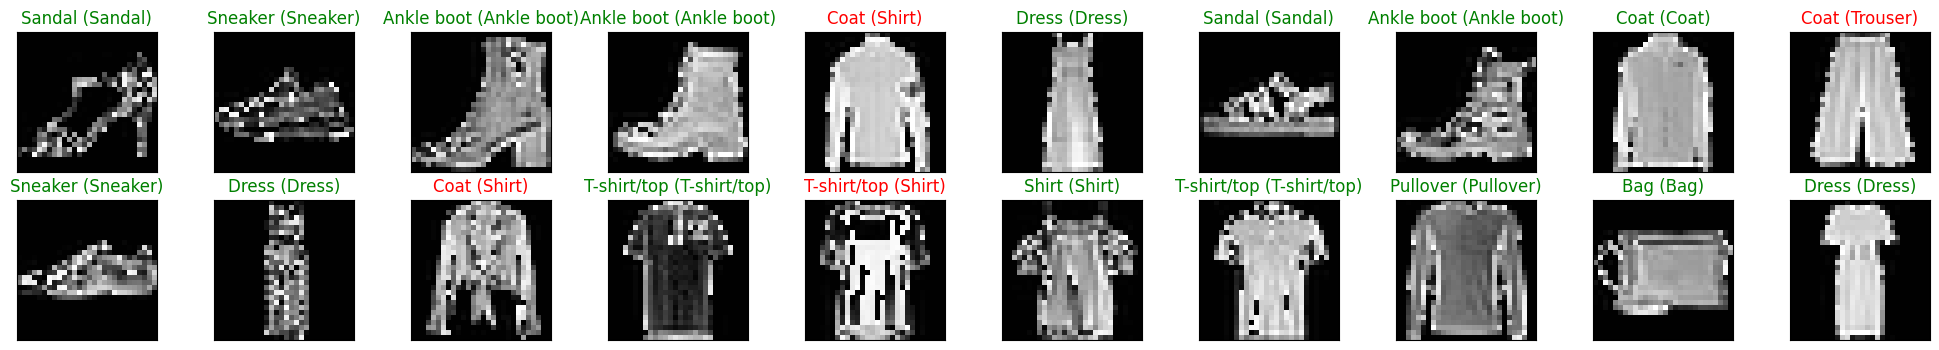

In [32]:
# 학습한 모델 plt로 확인해보기
evaluation(model)